In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

2.Define the Neural Network Architecture

In [2]:
def build_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),        # Flatten the input
        Dense(128, activation='relu'),           # First hidden layer
        Dropout(0.5),                            # Dropout for regularization
        Dense(64, activation='relu'),            # Second hidden layer
        Dense(num_classes, activation='softmax') # Output layer
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


3. Dataset Preparation and Model Training

In [4]:
# Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7883 - loss: 0.6733 - val_accuracy: 0.9507 - val_loss: 0.1683
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9261 - loss: 0.2486 - val_accuracy: 0.9604 - val_loss: 0.1304
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9382 - loss: 0.2051 - val_accuracy: 0.9643 - val_loss: 0.1169
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9453 - loss: 0.1782 - val_accuracy: 0.9664 - val_loss: 0.1103
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9504 - loss: 0.1637 - val_accuracy: 0.9695 - val_loss: 0.1074
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9541 - loss: 0.1507 - val_accuracy: 0.9721 - val_loss: 0.1021
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9562 - loss: 0.1407 - val_accuracy: 0.9723 - val_loss: 0.0965
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9585 - loss: 0.1292 -

[0.0832347571849823, 0.977400004863739]

b. CIFAR-10: Object Recognition (10 classes)

In [5]:
# Load and prepare the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((32, 32, 3), 10)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1507 - loss: 2.2256 - val_accuracy: 0.2277 - val_loss: 2.0396
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1637 - loss: 2.1406 - val_accuracy: 0.2431 - val_loss: 2.0378
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.1885 - loss: 2.0999 - val_accuracy: 0.2318 - val_loss: 2.0408
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1920 - loss: 2.0896 - val_accuracy: 0.2518 - val_loss: 1.9839
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1894 - loss: 2.0787 - val_accuracy: 0.2384 - val_loss: 2.0484
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1944 - loss: 2.0807 - val_accuracy: 0.2442 - val_loss: 2.0398
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1973 - loss: 2.0678 - val_accuracy: 0.2300 - val_loss: 2.0373
Epoch 8/20
1250/1250 ━━━━━━━━

[2.111150026321411, 0.22259999811649323]

c. Iris: Flower Classification (3 classes)


In [6]:
# Load and prepare the Iris dataset
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# Build and train the model
model = build_model((4,), 3)  # Input shape is 4 for the Iris dataset
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3621 - loss: 1.3207 - val_accuracy: 0.7083 - val_loss: 0.9000
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5478 - loss: 0.9293 - val_accuracy: 0.7083 - val_loss: 0.8187
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5655 - loss: 0.8679 - val_accuracy: 0.7083 - val_loss: 0.7047
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4204 - loss: 0.9337 - val_accuracy: 0.7917 - val_loss: 0.6476
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6409 - loss: 0.7932 - val_accuracy: 0.7083 - val_loss: 0.5849
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7356 - loss: 0.6583 - val_accuracy: 0.8333 - val_loss: 0.5492
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6713 - loss: 0.7198 - val_accuracy: 0.8750 - val_loss: 0.5091
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7149 - loss: 0.6189 - val_accuracy: 0.9583 - val_loss: 0.4

[0.09041336923837662, 1.0]

d. Fashion-MNIST: Clothing Item Classification (10 classes)


In [8]:
# Load and prepare the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build and train the model
model = build_model((28, 28), 10)
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6906 - loss: 0.8748 - val_accuracy: 0.8372 - val_loss: 0.4494
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8094 - loss: 0.5188 - val_accuracy: 0.8366 - val_loss: 0.4262
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8263 - loss: 0.4712 - val_accuracy: 0.8573 - val_loss: 0.3891
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8407 - loss: 0.4428 - val_accuracy: 0.8599 - val_loss: 0.3743
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8427 - loss: 0.4286 - val_accuracy: 0.8599 - val_loss: 0.3738
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8479 - loss: 0.4147 - val_accuracy: 0.8686 - val_loss: 0.3633
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8546 - loss: 0.3931 - val_accuracy: 0.8648 - val_loss: 0.3580
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8556 - loss: 0.3865 

[0.35203611850738525, 0.8716999888420105]

e. Reuters Newswire: Text Categorization (46 classes)

In [9]:
from tensorflow.keras.datasets import reuters

# Load and prepare the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)

# Build and train the model
model = build_model((10000,), 46)
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
model.evaluate(x_test, y_test)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4741 - loss: 2.3449 - val_accuracy: 0.7362 - val_loss: 1.1552
Epoch 2/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7817 - loss: 0.9661 - val_accuracy: 0.7930 - val_loss: 0.9423
Epoch 3/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8549 - loss: 0.6248 - val_accuracy: 0.8080 - val_loss: 0.8719
Epoch 4/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8989 - loss: 0.4055 - val_accuracy: 0.8169 - val_loss: 0.8659
Epoch 5/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9270 - loss: 0.2927 - val_accuracy: 0.8119 - val_loss: 0.9363
Epoch 6/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9431 - loss: 0.2346 - val_accuracy: 0.8080 - val_loss: 0.9692
Epoch 7/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9476 - loss: 0.2003 - val_accuracy: 0.8125 - val_loss: 0.9524
Epoch 8/15
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/

[1.2986881732940674, 0.7943009734153748]

4. Evaluation

In [10]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("Test Accuracy:", model.evaluate(x_test, y_test)[1])
    print("Classification Report:\n", classification_report(y_true, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

# Example: Evaluate the MNIST model
evaluate_model(model, x_test, y_test)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8005 - loss: 1.2765
Test Accuracy: 0.7943009734153748
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.71      0.79      0.75       105
           2       0.80      0.60      0.69        20
           3       0.94      0.92      0.93       813
           4       0.73      0.91      0.81       474
           5       0.00      0.00      0.00         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.86      0.76      0.81        25
          10       0.84      0.90      0.87        30
          11       0.65      0.75      0.69        83
          12       0.57      0.31      0.40        13
          13       0.62      0.68      0.65        37
          14       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


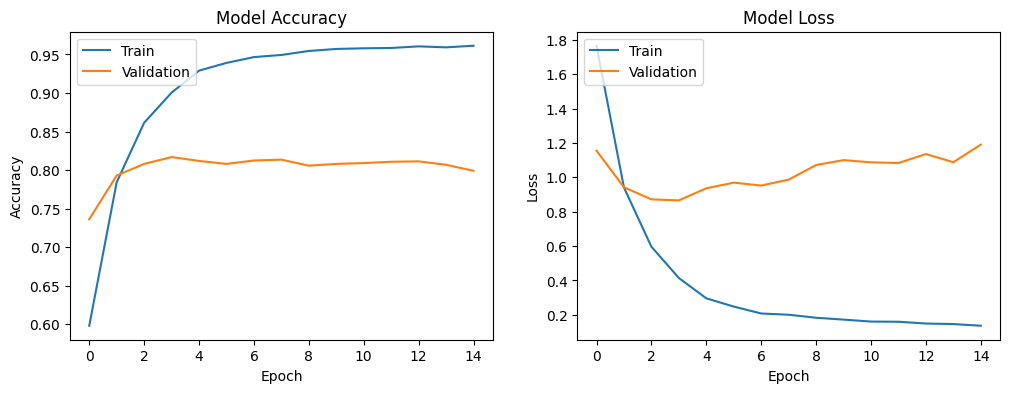

In [11]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Example: Plot training history for MNIST model
plot_training_history(history)
